# K-Means Clustering Method

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datasets=pd.read_csv("football_data.csv")

In [5]:
datasets.head()

,Player Name,Position,Goals,Assists,Tackles,Pass Accuracy,Dribbles per Game,Interceptions,Shots per Game,Yellow Cards,Red Cards
0,Neymar,Midfielder,17,10,103,84.20,4.11,0,4.16,3,1
1,Neymar,Midfielder,3,8,52,96.36,5.18,26,0.85,0,1
2,Kevin De Bruyne,Defender,25,21,12,83.16,5.52,4,1.38,0,2
3,Kevin De Bruyne,Forward,23,13,118,97.83,3.78,49,0.18,0,0
4,Kevin De Bruyne,Midfielder,24,6,47,88.44,0.62,4,1.15,9,1


In [6]:
new_dataset=datasets[["Goals","Assists","Tackles","Pass Accuracy"]]


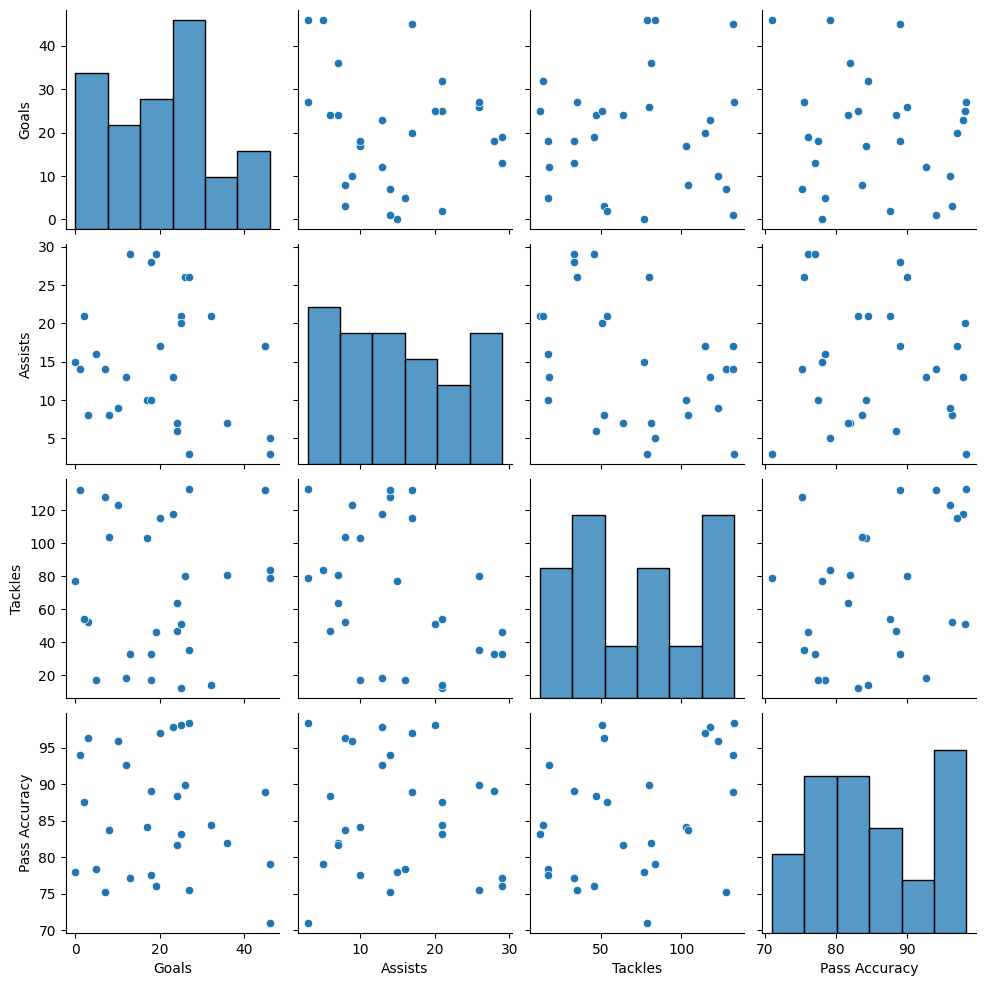

In [7]:
sns.pairplot(data=new_dataset)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_dataset)


In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]
for i in range(2,22):
    km=KMeans(n_clusters=i,init="k-means++")
    km.fit(scaled_features)
    wcss.append(km.inertia_)
    

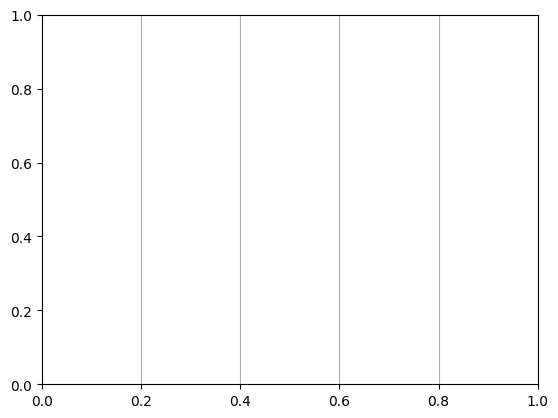

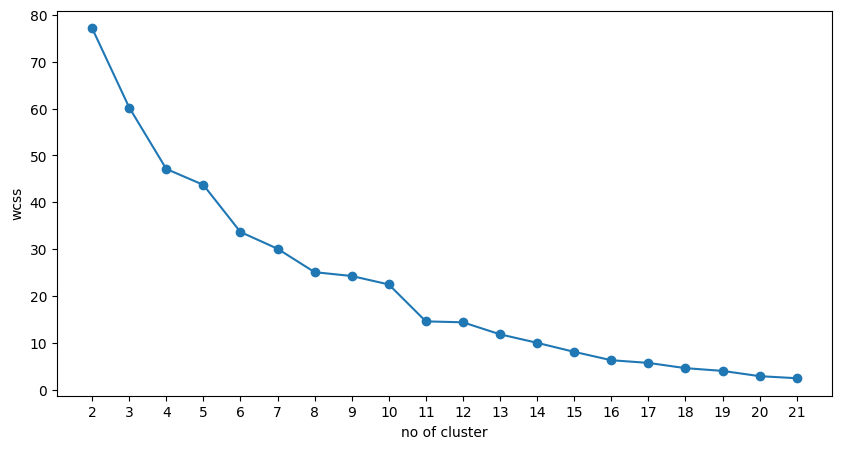

In [12]:
plt.grid(axis="x")
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,22)],wcss,marker="o")
plt.xlabel("no of cluster")
plt.xticks([i for i in range(2,22)])
plt.ylabel("wcss")
plt.show()

In [21]:
kmn=KMeans(n_clusters=4)
new_dataset["predict"] =kmn.fit_predict(scaled_features)


C:\Users\HP\AppData\Local\Temp\ipykernel_14704\956064512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset["predict"] =kmn.fit_predict(scaled_features)


<Figure size 1000x500 with 0 Axes>

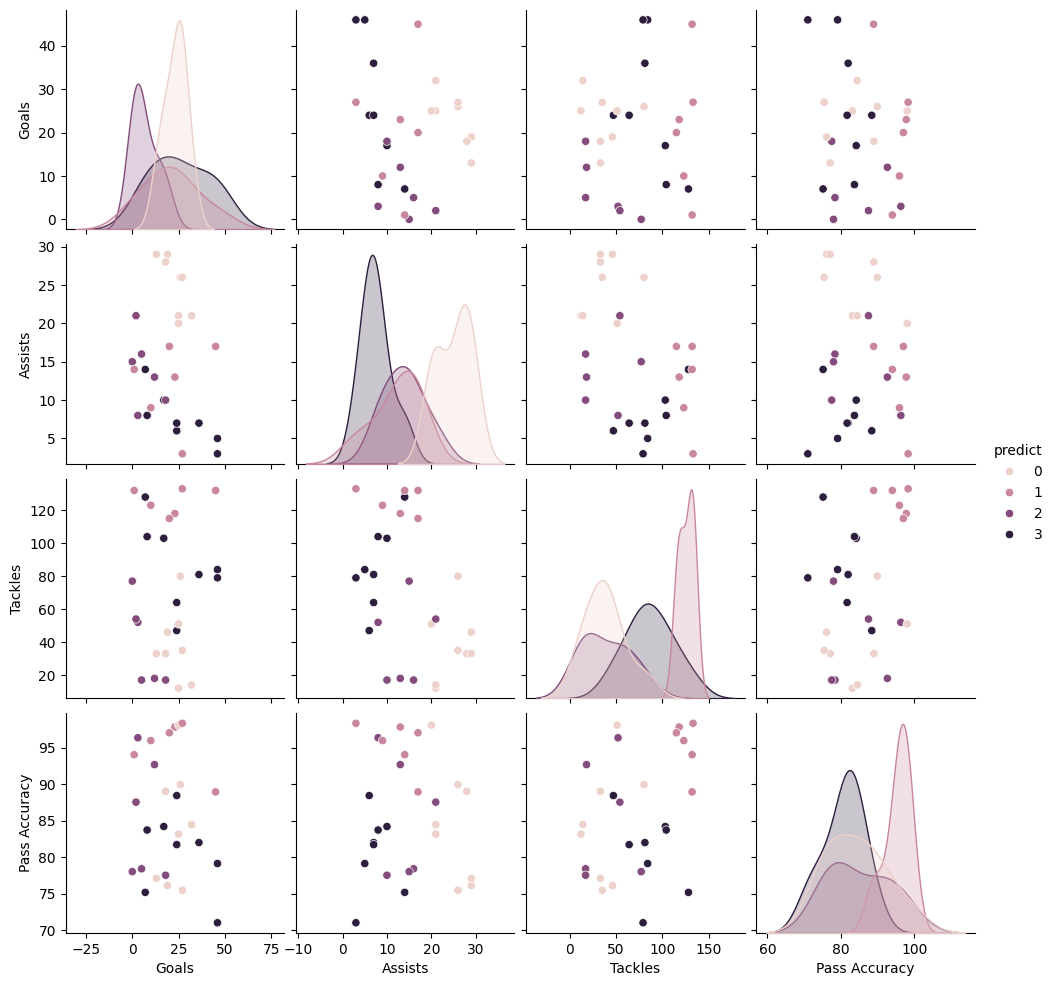

In [23]:
plt.figure(figsize=(10,5))
plt.savefig("cluster.jpg")
sns.pairplot(data=new_dataset,hue="predict")
plt.show()